In [4]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("med1.csv")

In [7]:
# Check top few records to get a feel of the data structure
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

SEX :  2
sex
female    662
male      676
Name: count, dtype: int64


SMOKER :  2
smoker
yes     274
no     1064
Name: count, dtype: int64


REGION :  4
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Run get_dummies
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

# Convert any boolean columns to int (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [12]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [13]:
# Are there any missing values ?
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [14]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 1


In [16]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1338, 9)
After (1337, 9)


In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


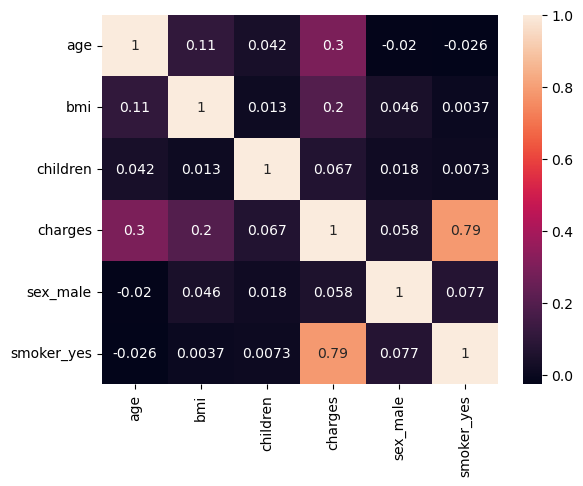

In [18]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   int32  
 5   smoker_yes        1337 non-null   int32  
 6   region_northwest  1337 non-null   int32  
 7   region_southeast  1337 non-null   int32  
 8   region_southwest  1337 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 78.3 KB


In [20]:
# Step 1: Define columns eligible for uint8 conversion
# uint8 supports values from 0 to 255
uint8_candidates = []

for col in df.columns:
    if pd.api.types.is_integer_dtype(df[col]) and df[col].min() >= 0 and df[col].max() <= 255:
        uint8_candidates.append(col)

# Step 2: Convert eligible columns to uint8
df[uint8_candidates] = df[uint8_candidates].astype('uint8')

# Step 3: Confirm conversion
print("Converted columns to uint8:", uint8_candidates)
print(df.dtypes)


Converted columns to uint8: ['age', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
age                   uint8
bmi                 float64
children              uint8
charges             float64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


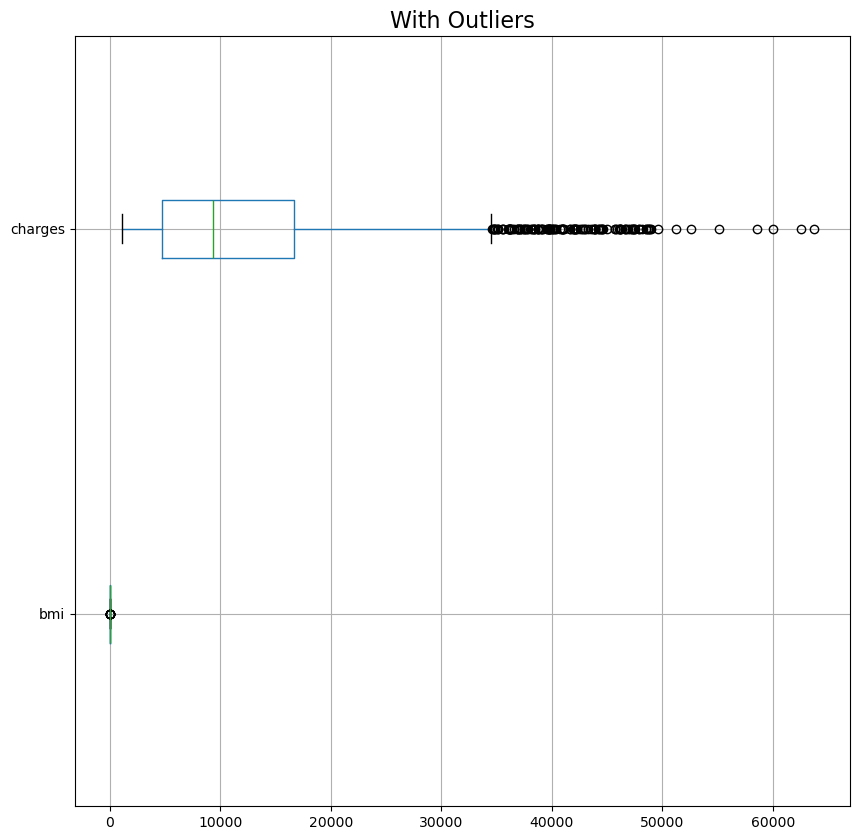

In [21]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

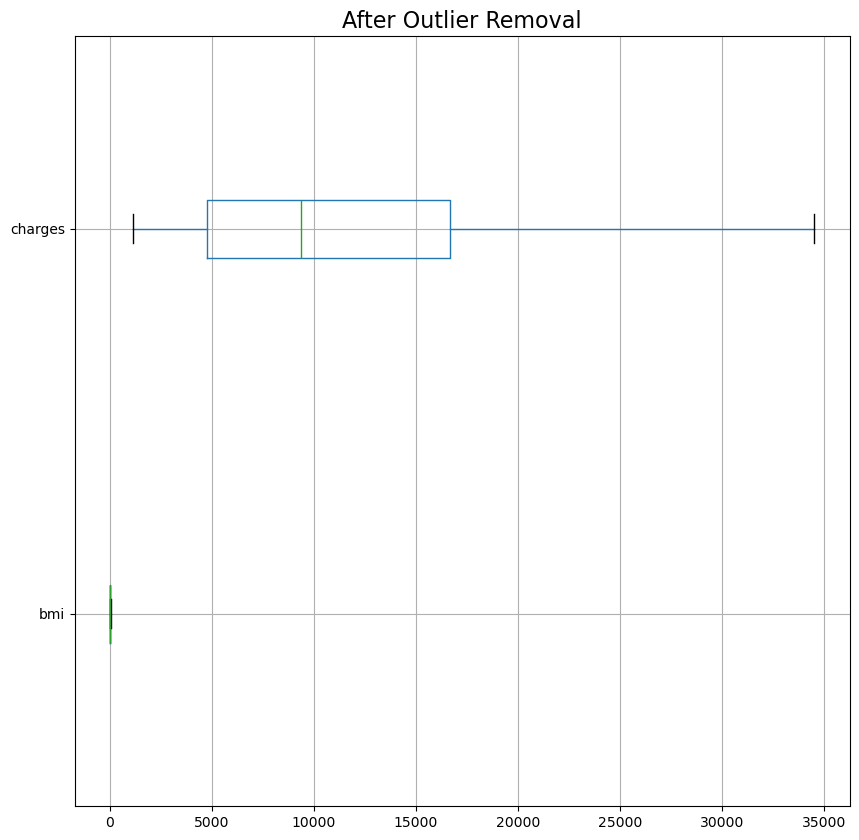

In [24]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

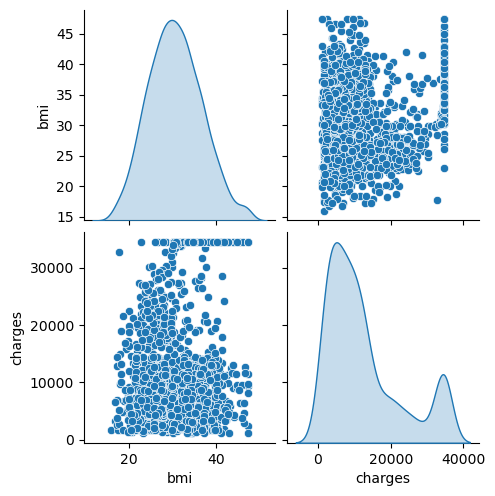

In [25]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

In [26]:
# Copy all the predictor variables into X dataframe
X = df.drop('charges', axis=1)

# Copy target into the y dataframe. 
y = df[['charges']]

In [27]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [28]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [29]:
import statsmodels.api as sm

In [30]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [31]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     375.5
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          4.73e-294
Time:                        19:29:44   Log-Likelihood:                -9989.6
No. Observations:                1002   AIC:                         2.000e+04
Df Residuals:                     993   BIC:                         2.004e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7981.4446    992.856  

In [32]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const               36.616114
age                  1.019160
bmi                  1.101227
children             1.006324
sex_male             1.009978
smoker_yes           1.011398
region_northwest     1.511842
region_southeast     1.644610
region_southwest     1.534285
dtype: float64



In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Recompute VIFs on the cleaned training set
X_vif = sm.add_constant(X_train)   # include constant for regression
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data)


            feature        VIF
0             const  36.616114
1               age   1.019160
2               bmi   1.101227
3          children   1.006324
4          sex_male   1.009978
5        smoker_yes   1.011398
6  region_northwest   1.511842
7  region_southeast   1.644610
8  region_southwest   1.534285


In [34]:
olsmod_1 = sm.OLS(y_train, X_train)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     375.5
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          4.73e-294
Time:                        19:29:44   Log-Likelihood:                -9989.6
No. Observations:                1002   AIC:                         2.000e+04
Df Residuals:                     993   BIC:                         2.004e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7981.4446    992.856  

In [35]:
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     375.5
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          4.73e-294
Time:                        19:29:44   Log-Likelihood:                -9989.6
No. Observations:                1002   AIC:                         2.000e+04
Df Residuals:                     993   BIC:                         2.004e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7981.4446    992.856  

In [36]:
X_train4 = X_train.drop(["sex_male","region_northwest"], axis=1)

olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()

print("R-squared:", np.round(olsres_3.rsquared, 3))
print("Adjusted R-squared:", np.round(olsres_3.rsquared_adj, 3))
print(olsres_3.summary())



R-squared: 0.751
Adjusted R-squared: 0.749
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     498.9
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          7.10e-296
Time:                        19:29:44   Log-Likelihood:                -9991.6
No. Observations:                1002   AIC:                         2.000e+04
Df Residuals:                     995   BIC:                         2.003e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Recompute VIFs on the cleaned training set
X_vif = sm.add_constant(X_train4)   # include constant for regression
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data)

            feature        VIF
0             const  34.301400
1               age   1.018824
2               bmi   1.096967
3          children   1.002159
4        smoker_yes   1.006553
5  region_southeast   1.238560
6  region_southwest   1.152374


In [38]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_3.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_3.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,12622.17950,12892.691504,-270.512004
1,7986.47525,7888.832983,97.642267
2,14254.60820,12155.807396,2098.800804
3,2130.67590,4178.318185,-2047.642285
4,3201.24515,7834.606099,-4633.360949


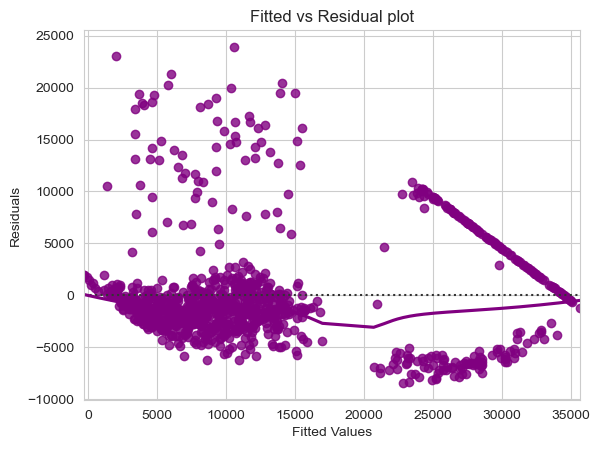

In [39]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [40]:
import statsmodels.stats.api as sms
from scipy import stats


In [41]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8266085728133417, pvalue=1.4290153688478593e-31)

In [42]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)[1]

0.5018195584276197

In [43]:
olsres_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     498.9
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          7.10e-296
Time:                        19:29:45   Log-Likelihood:                -9991.6
No. Observations:                1002   AIC:                         2.000e+04
Df Residuals:                     995   BIC:                         2.003e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8392.3629    961.949     -8.724      0.000   -1.03e+04   -6504.681
age                222.7928     11.866     18.776      0.000     199.507     246.078
bmi                259.6580     29.028      8.945      0.000     202.695     316.621
children           516.2454    137.811      3.746      0.000     245.813     786.678
smoker_yes        1.998e+04    396.788     50.350      0.000    1.92e+04    2.08e+04
region_southeast  -904.9191    410.092     -2.207      0.028   -1709.664    -100.175
region_southwest  -723.9126    409.109     -1.769      0.077   -1526.727      78.902
==============================================================================
Omnibus:                      354.478   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.764
Skew:                           1.775   Prob(JB):                    1.88e-238
Kurtosis:                       6.691   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Let us write the equation of linear regression
Equation = "insurance_cost ="
print(Equation, end=" ")
for i in range(len(X_train4.columns)):
    if i == 0:
        print(olsres_3.params[i], "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            olsres_3.params[i],
            "* (",
            X_train4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_3.params[i], "* (", X_train4.columns[i], ")")

insurance_cost = -8392.362945047676 + 222.79283430498805 * ( age ) +  259.6579657027918 * ( bmi ) +  516.2454126528886 * ( children ) +  19978.404828959425 * ( smoker_yes ) +  -904.9191150232316 * ( region_southeast ) +  -723.9125956397431 * ( region_southwest )


In [45]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train4, y_train)

LinearRegression()

In [46]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train4.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for age is 222.79283430498603
The coefficient for bmi is 259.6579657027924
The coefficient for children is 516.2454126528868
The coefficient for smoker_yes is 19978.404828959432
The coefficient for region_southeast is -904.919115023226
The coefficient for region_southwest is -723.9125956397357


In [47]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8392.362945047631


###### 

In [ ]:

# R²
print("R² on train:", regression_model.score(X_train4, y_train))
print("R² on test:", regression_model.score(X_test, y_test))


In [ ]:
# RMSE
pred_train = regression_model.predict(X_train)
pred_test  = regression_model.predict(X_test)

In [ ]:
print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_test)))